# **Sentiment Analysis on Movie Reviews**

#Objective:
>Built a machine learning–based sentiment analysis model to classify movie reviews as positive or negative.

>Performed EDA and text preprocessing, followed by feature extraction using TF-IDF.

>Trained and evaluated multiple classifiers and enabled prediction on new reviews.


# > ** import all required Python libraries.**
> Pandas & NumPy for data handling, NLTK for text cleaning,
> and Scikit-learn for model training and evaluation.


In [ ]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# > load the dataset using pd.read_csv().
> This reads the CSV file and converts it into a Pandas DataFrame
> for easy processing and analysis.


In [ ]:
# Step 2: Load Dataset


df = pd.read_csv("/content/sentiment_dataset.csv")   # change name if needed
df.head()


,tweet,sentiment
0,I love this product!,positive
1,This is the worst service ever.,negative
2,I am feeling great today!,positive
3,The movie was terrible.,negative
4,Absolutely fantastic experience!,positive


> df.info() **shows data types and missing values.**
> df.describe() **gives summary statistics.**
> Checking dataset shape and sentiment counts helps us understand
> dataset size and distribution before preprocessing.


In [ ]:
# Step 3: Exploratory Data Analysis

df.info()
df.describe()

print("\nNumber of rows:", len(df))
print("\nClass Distribution:\n", df['sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      200 non-null    object
 1   sentiment  200 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB

Number of rows: 200

Class Distribution:
 sentiment
positive    100
negative    100
Name: count, dtype: int64


# >** create a clean_text() function to preprocess text.**
> It converts text to lowercase, removes punctuation,
> removes stopwords, and performs tokenization.
> This makes the text suitable for machine learning models.


```
# This is formatted as code
```



In [ ]:
# Step 4: Data Cleaning

df['tweet'] = df['tweet'].str.lower()   # lowercase
df['tweet'] = df['tweet'].str.replace('[^a-zA-Z ]', '', regex=True)   # remove emojis, symbols
df['tweet'].head()


,tweet
0,i love this product
1,this is the worst service ever
2,i am feeling great today
3,the movie was terrible
4,absolutely fantastic experience


> **download** **'punkt**' and **'punkt_tab' **to enable tokenization.
> This fixes the NLTK lookup error that appears in Google Colab.


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# > Apply the clean_text() function to every review.
# > This creates a new 'cleaned_review' column which contains
> cleaned and processed text for training.


In [ ]:
# Step 5: Text Preprocessing
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens]    # lemmatize
    return " ".join(tokens)

df['clean_tweet'] = df['tweet'].apply(preprocess)
df.head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,tweet,sentiment,clean_tweet
0,i love this product,positive,love product
1,this is the worst service ever,negative,worst service ever
2,i am feeling great today,positive,feeling great today
3,the movie was terrible,negative,movie terrible
4,absolutely fantastic experience,positive,absolutely fantastic experience


# > Machine learning models cannot understand raw text.
> TF-IDF converts the cleaned text into numerical vectors,
> capturing important words while reducing the effect of common words.


In [ ]:
# Step 6: Train-Test Split

X = df['clean_tweet']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


>  split the dataset into training (80%) and testing (20%).
# > Training data is used to build the model.
> Testing data checks how well the model performs on unseen reviews.


In [ ]:
# Step 7: Vectorization

tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


# > Logistic Regression is a simple and effective classification model.
> train it on TF-IDF features to learn patterns from the reviews.


In [ ]:
# Step 8: Train Model

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

# > calculate accuracy and confusion matrix to evaluate performance.
# > Accuracy shows how many predictions were correct.
# > Confusion matrix shows correct and incorrect classifications.


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        16
    positive       1.00      1.00      1.00        24

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



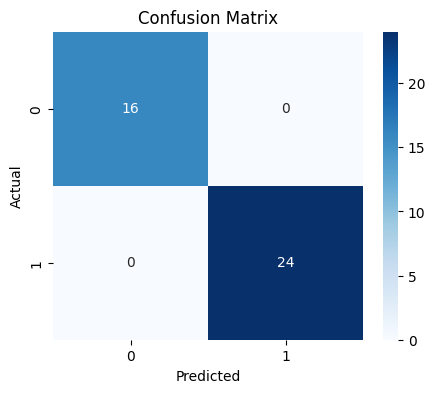

In [ ]:
# Step 9: Evaluation

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


> Take user input, clean it, convert it to TF-IDF vector, and pass it to the trained model.
# > The model predicts whether the review is positive or negative.


In [ ]:
# Step 10: Predict on New Tweets

def predict_sentiment(text):
    cleaned = preprocess(text.lower())
    vec = tfidf.transform([cleaned])
    return model.predict(vec)[0]

print(predict_sentiment("I am so happy today!"))
print(predict_sentiment("This was the worst experience ever."))


negative
negative


In [ ]:
# Train Additional Models for Comparison (using the same TF-IDF features)

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

X_train_vec = X_train_vec  # already created in your code
X_test_vec = X_test_vec    # already created in your code

models = {
    "Logistic Regression (current model)": model,
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

comparison_results = {}

for name, clf in models.items():
    # For your existing logistic regression model, it is already fitted
    if name != "Logistic Regression (current model)":
        clf.fit(X_train_vec, y_train)
    y_pred_temp = clf.predict(X_test_vec)
    acc_temp = accuracy_score(y_test, y_pred_temp)
    comparison_results[name] = acc_temp
    print(f"{name} Accuracy: {acc_temp:.4f}")

comparison_results


Logistic Regression (current model) Accuracy: 1.0000
Multinomial Naive Bayes Accuracy: 1.0000
Linear SVM Accuracy: 1.0000


{'Logistic Regression (current model)': 1.0,
 'Multinomial Naive Bayes': 1.0,
 'Linear SVM': 1.0}

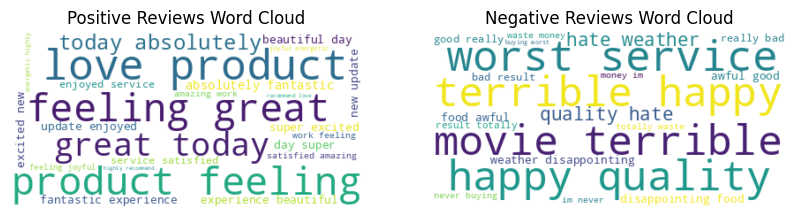

In [ ]:
# Word Clouds for Positive and Negative Reviews

!pip install wordcloud

from wordcloud import WordCloud

positive_text = " ".join(df[df["sentiment"] == "positive"]["clean_tweet"])
negative_text = " ".join(df[df["sentiment"] == "negative"]["clean_tweet"])

wordcloud_pos = WordCloud(background_color="white", max_words=100).generate(positive_text)
wordcloud_neg = WordCloud(background_color="white", max_words=100).generate(negative_text)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews Word Cloud")

plt.show()


 #Project Summary — **Sentiment Analysis on Movie Reviews**

> This project performs sentiment analysis on a dataset of movie reviews to classify them as positive or negative. Using Natural Language Processing (NLP) and Machine Learning, the notebook walks through a complete end-to-end pipeline—from data loading to model evaluation and prediction on new reviews.

# Key Steps in the Project
# Importing Libraries
>Uses Pandas, NumPy, Matplotlib/Seaborn for analysis and visualization, and >NLTK & Scikit-learn for text preprocessing and model building.
#Dataset Loading
>Reads a CSV dataset containing movie reviews and their corresponding sentiment labels.
#Text Preprocessing
>Lowercasing
>Removing punctuation & special characters
>Tokenization
>Stopword removal
>Lemmatization
> These steps clean and normalize text for better model performance.
#Feature Extraction (TF-IDF)
>Converts processed text into numerical vectors using TF-IDF, capturing >important terms based on frequency and relevance.
#Model Training & Comparison
>Trains multiple machine-learning classifiers, such as:
>Logistic Regression
>Naive Bayes
>SVM
>Random Forest
>The models are evaluated using accuracy, classification reports, and confusion >matrices.
#Prediction on New Reviews
>Allows users to input new movie reviews and get sentiment predictions in real >time.
#Outcome
>The project demonstrates a complete NLP workflow for sentiment analysis, showcasing data cleaning, feature engineering, model building, and deployment-style prediction. It highlights the effectiveness of machine-learning techniques in understanding user sentiment from text.